In [10]:
!pip install pytorch-adapt[detection]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 151 kB 5.1 MB/s 
  Attempting uninstall: pytorch-adapt
    Found existing installation: pytorch-adapt 0.0.78.dev2
    Uninstalling pytorch-adapt-0.0.78.dev2:
      Successfully uninstalled pytorch-adapt-0.0.78.dev2


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

from pytorch_adapt.datasets import (
    get_domainnet126,
    get_mnist_mnistm,
    get_office31,
    get_officehome,
    get_voc_multilabel
)

In [3]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

inv_normalize = torchvision.transforms.Normalize(
    mean=[-m / s for m, s in zip(mean, std)], std=[1 / s for s in std]
)


def imshow(img, figsize=(8, 4)):
    img = inv_normalize(img)
    npimg = img.numpy()
    plt.figure(figsize=figsize)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


def imshow_many(datasets, src, target):
    d = datasets["train"]
    for name in ["src_imgs", "target_imgs"]:
        domains = src if name == "src_imgs" else target
        if len(domains) == 0:
            continue
        print(domains)
        imgs = [d[i][name] for i in np.random.choice(len(d), size=16, replace=False)]
        imshow(torchvision.utils.make_grid(imgs))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/134178716 [00:00<?, ?it/s]

100%|██████████| 68007/68007 [00:13<00:00, 4952.51it/s]


['mnist']


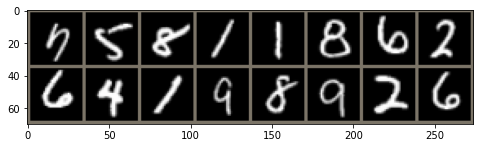

['mnistm']


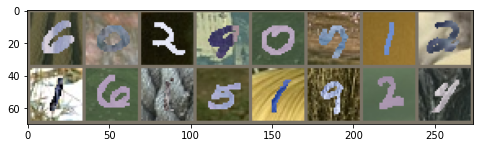

In [4]:
src, target = ["mnist"], ["mnistm"]
datasets = get_mnist_mnistm(src, target, folder=".", download=True)
imshow_many(datasets, src, target)

  0%|          | 0/77215838 [00:00<?, ?it/s]

100%|██████████| 4216/4216 [00:01<00:00, 2444.67it/s]


['amazon']


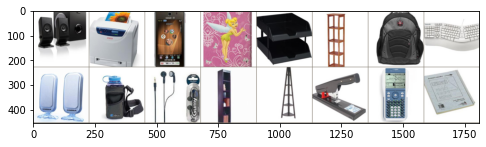

['dslr']


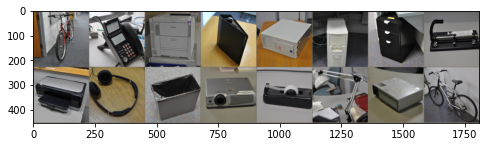

['webcam']


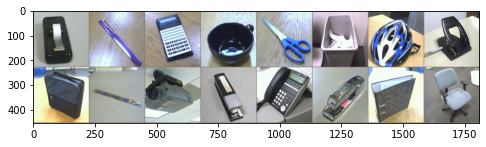

In [5]:
for src, target in [(["amazon"], ["dslr"]), (["webcam"], [])]:
    datasets = get_office31(src, target, folder=".", download=True)
    imshow_many(datasets, src, target)

  0%|          | 0/1358923211 [00:00<?, ?it/s]

100%|██████████| 15861/15861 [00:14<00:00, 1068.69it/s]


['art']


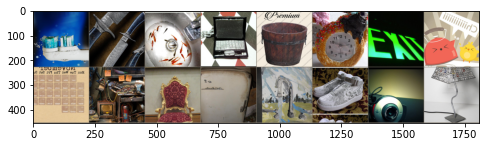

['clipart']


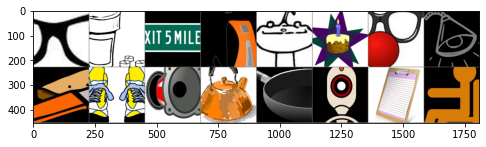

['product']


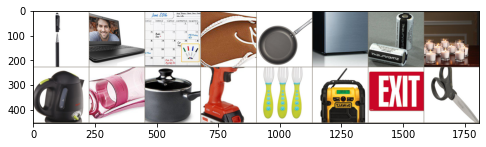

['real']


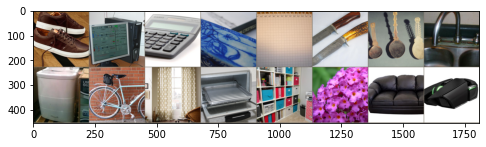

In [6]:
for src, target in [(["art"], ["clipart"]), (["product"], ["real"])]:
    datasets = get_officehome(src, target, folder=".", download=True)
    imshow_many(datasets, src, target)

  0%|          | 0/5450274100 [00:00<?, ?it/s]

100%|██████████| 145177/145177 [01:32<00:00, 1562.96it/s]


['clipart']


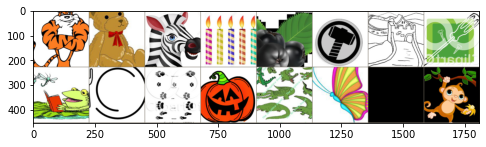

['painting']


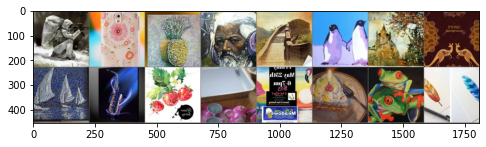

['real']


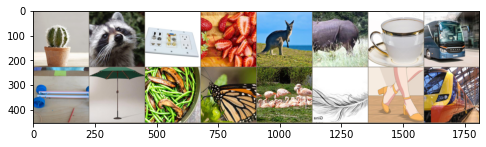

['sketch']


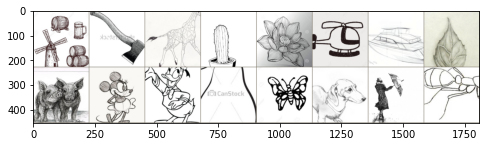

In [7]:
for src, target in [(["clipart"], ["painting"]), (["real"], ["sketch"])]:
    datasets = get_domainnet126(src, target, folder=".", download=True)
    imshow_many(datasets, src, target)

['voc']


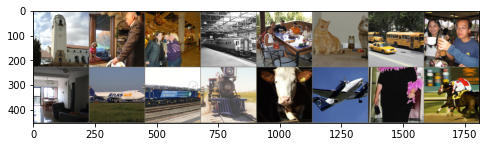

['clipart']


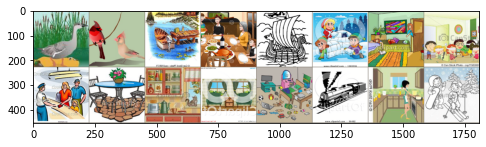

In [4]:
for src, target in [(["voc"], ["clipart"])]:
    datasets = get_voc_multilabel(src, target, folder=".", download=True)
    imshow_many(datasets, src, target)